In [1]:
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import warnings
warnings.simplefilter("ignore")

In [3]:
data_df1 = pd.read_csv("reddit_wsb.csv")
data_df2 = pd.read_csv("early_reddit_wsb.csv") 

In [4]:
data_df = pd.concat([data_df2, data_df1], axis = "rows", join = "inner")

In [5]:
data_df.tail()

,title,score,id,url,comms_num,created,body,timestamp
32371,Robinhood has been stealing money from loyal c...,31,ldv11t,https://i.redd.it/js910mnh1uf61.jpg,19,1.612635e+09,NaN,2021-02-06 20:14:41
32372,Can we make a pen for all these retarded newco...,17,ldv0us,https://www.reddit.com/r/wallstreetbets/commen...,33,1.612635e+09,can we make one megathread for gme and ban all...,2021-02-06 20:14:17
32373,What If We Do To Copper & Silver The Same Thin...,0,ldv0dx,https://www.reddit.com/r/wallstreetbets/commen...,29,1.612635e+09,What If We Do To Copper & Silver The Same Thin...,2021-02-06 20:13:24
32374,Outlining the problems with Option hedging nar...,27,lduv2m,https://www.reddit.com/r/wallstreetbets/commen...,15,1.612635e+09,"Hello WSB, honest new poster here. My experien...",2021-02-06 20:08:55
32375,Looking for stocks to invest in.,0,lduouh,https://www.reddit.com/r/wallstreetbets/commen...,19,1.612635e+09,"I own 15 different stocks at the moment, and a...",2021-02-06 20:06:08


In [6]:
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "still", "will", "let"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

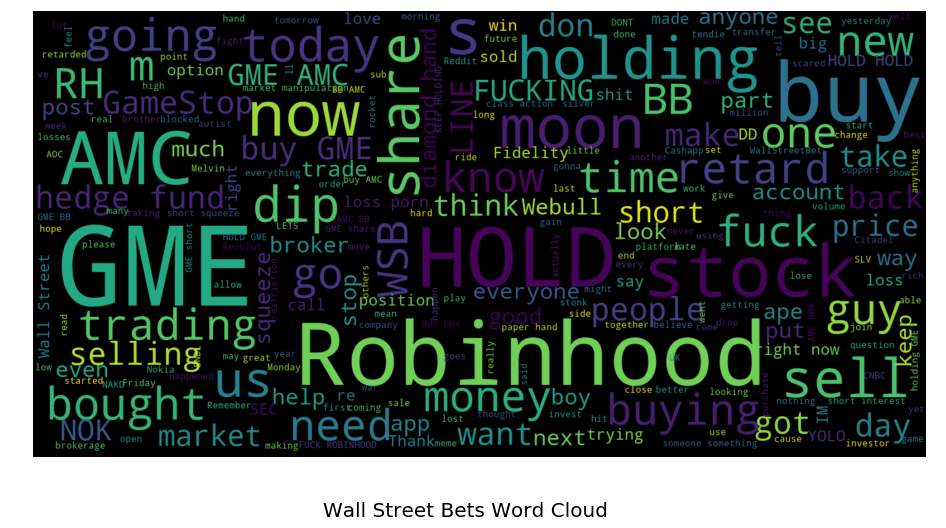

In [7]:
show_wordcloud(data_df['title'], title = 'Wall Street Bets Word Cloud')

In [8]:
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(post)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral"     
    
def find_score(post):
    return (sia.polarity_scores(post)["compound"])
    
def sentiment_to_int(x):
    if(x=="Positive"):
        return 1
    elif(x=="Negative"):
        return -1
    else:
        return 0


In [9]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()
    #plot_sentiment(data_df, 'title_sentiment', 'Title')

In [10]:
data_df['date'] = pd.to_datetime(data_df["timestamp"]).dt.date

In [11]:
#data_df['title_sentiment'] = data_df['title'].apply(lambda x: find_sentiment(x))
data_df['sentiment_score'] = data_df['title'].apply(lambda x: find_score(x))

In [12]:
data_df.head()

,title,score,id,url,comms_num,created,body,timestamp,date,sentiment_score
0,BB Gang you failed me! #WRECKED,1,ky5z6y,NaN,2,1.610751e+09,NaN,2021-01-15 17:50:10,2021-01-15,-0.5562
1,I’m doing my part in GME. Going to HODL my way...,1,ky5yvy,NaN,0,1.610751e+09,NaN,2021-01-15 17:49:43,2021-01-15,0.0000
2,ZOM @ $40 by next week,1,ky5ymq,NaN,0,1.610751e+09,NaN,2021-01-15 17:49:19,2021-01-15,0.0000
3,the short sellers must learn,1,ky5y3x,NaN,0,1.610751e+09,NaN,2021-01-15 17:48:33,2021-01-15,0.0000
4,Boomer Buffet reveals $SSP as secret position,1,ky5xey,NaN,2,1.610751e+09,NaN,2021-01-15 17:47:36,2021-01-15,0.0000


In [13]:
sentiment_score = pd.DataFrame(data_df.groupby("date").mean()['sentiment_score'])

In [14]:
data_df.groupby("date").count()

,title,score,id,url,comms_num,created,body,timestamp,sentiment_score
date,,,,,,,,,
2021-01-15,100,100,100,0,100,100,5,100,100
2021-01-16,100,100,100,0,100,100,12,100,100
2021-01-17,100,100,100,0,100,100,21,100,100
2021-01-18,100,100,100,0,100,100,25,100,100
2021-01-19,100,100,100,0,100,100,11,100,100
2021-01-20,100,100,100,0,100,100,6,100,100
2021-01-21,100,100,100,0,100,100,10,100,100
2021-01-22,100,100,100,0,100,100,20,100,100
2021-01-23,100,100,100,0,100,100,8,100,100


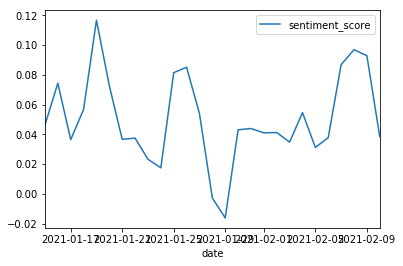

In [15]:
sentiment_score.plot()

In [17]:
sentiment_score.index = pd.to_datetime(sentiment_score.index)

In [18]:
sentiment_score = sentiment_score.loc[sentiment_score.index>="2021-01-19"]

In [19]:
sentiment_score

,sentiment_score
date,
2021-01-19,0.116594
2021-01-20,0.072556
2021-01-21,0.036638
2021-01-22,0.037420
2021-01-23,0.023230
2021-01-24,0.017498
2021-01-25,0.081397
2021-01-26,0.085044
2021-01-27,0.053835


In [20]:
sentiment_score.to_csv("sentiment_score.csv", index = True, header = True)